In [113]:
import pandas as pd
import numpy as np
import time
import warnings
import datetime as dt
warnings.filterwarnings('ignore')


In [114]:
Inflation_rate = pd.read_csv("Resources/Inflation_rate_2022.csv")
Mortage_rate = pd.read_csv("Resources/historical_country_United_States_indicator_30_Year_Mortgage_Rate.csv")
Mortage_size = pd.read_csv("Resources/historical_country_United_States_indicator_Average_Mortgage_Size.csv")
Average_House_price = pd.read_csv("Resources/historical_country_United_States_indicator_House_Price_Index_YoY.csv")
New_Home_sales = pd.read_csv("Resources/historical_country_United_States_indicator_New_Home_Sales.csv")
Buy_to_Rent_Ratio = pd.read_csv("Resources/historical_country_United_States_indicator_Price_to_Rent_Ratio.csv")
Dataset = pd.read_csv("Resources/General_Dataset.csv")
Fed_Interest_Rate = pd.read_csv("Resources/Fed_Interest_rate.csv")
Inflation_erik = pd.read_csv("Resources/inflation.csv")


In [115]:
Inflation_rate['Year'] = Inflation_rate['Year'].map("{:.0f}".format)
Inflation_rate = Inflation_rate.set_index('Year')
Inflation_rate = Inflation_rate.transpose()
Inflation_rate = Inflation_rate.reset_index()
Inflation_rate.rename(columns={'index':'Month'},inplace=True)
Inflation_rate.head(10)


Year,Month,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,1920,1919,1918,1917,1916,1915,1914,nan,nan,nan
0,Jan,7.48,1.40,2.49,1.55,2.07,2.50,1.37,-0.09,1.58,...,16.97,17.86,19.66,12.50,2.97,1.00,2.04,NaN,NaN,NaN
1,Feb,7.87,1.68,2.33,1.52,2.21,2.74,1.02,-0.03,1.13,...,20.37,14.89,17.50,15.38,4.00,1.01,1.02,NaN,NaN,NaN
2,Mar,8.54,2.62,1.54,1.86,2.36,2.38,0.85,-0.07,1.51,...,20.12,17.14,16.67,14.29,6.06,0.00,1.02,NaN,NaN,NaN
3,Apr,8.26,4.16,0.33,2.00,2.46,2.20,1.13,-0.20,1.95,...,21.56,17.61,12.70,18.87,6.00,2.04,0.00,NaN,NaN,NaN
4,May,8.58,4.99,0.12,1.79,2.80,1.87,1.02,-0.04,2.13,...,21.89,16.55,13.28,19.63,5.94,2.02,2.06,NaN,NaN,NaN
5,Jun,9.06,5.39,0.65,1.65,2.87,1.63,1.00,0.12,2.07,...,23.67,14.97,13.08,20.37,6.93,2.02,1.02,NaN,NaN,NaN
6,Jul,8.52,5.37,0.99,1.81,2.95,1.73,0.83,0.17,1.99,...,19.54,15.23,17.97,18.52,6.93,1.00,1.01,NaN,NaN,NaN
7,Aug,8.26,5.25,1.31,1.75,2.70,1.94,1.06,0.20,1.70,...,14.69,14.94,18.46,19.27,7.92,-0.98,3.03,NaN,NaN,NaN
8,Sep,8.20,5.39,1.37,1.71,2.28,2.23,1.46,-0.04,1.66,...,12.36,13.38,18.05,19.82,9.90,-0.98,2.00,NaN,NaN,NaN
9,Oct,7.75,6.22,1.18,1.76,2.52,2.04,1.64,0.17,1.66,...,9.94,13.13,18.52,19.47,10.78,0.99,1.00,NaN,NaN,NaN


# first chart

In [120]:
Interest_rate = Fed_Interest_Rate.dropna(axis=1)
Interest_rate.head(10)

,Release Date,Actual,Forecast,Previous,Increase rate
0,"Dec 14, 2022",4.00%,4.50%,4.00%,0.000%
1,"Nov 02, 2022",4.00%,4.00%,3.25%,23.077%
2,"Sep 21, 2022",3.25%,3.25%,2.50%,30.000%
3,"Jul 27, 2022",2.50%,2.50%,1.75%,42.857%
4,"Jun 15, 2022",1.75%,1.50%,1.00%,75.000%
5,"May 04, 2022",1.00%,1.00%,0.50%,100.000%
6,"Mar 16, 2022",0.50%,0.50%,0.25%,100.000%
7,"Jan 26, 2022",0.25%,0.25%,0.25%,0.000%
8,"Dec 15, 2021",0.25%,0.25%,0.25%,0.000%
9,"Nov 03, 2021",0.25%,0.25%,0.25%,0.000%


In [123]:
import calendar
Interest_rate["Year"] = pd.DatetimeIndex(Interest_rate["Release Date"]).year

Interest_rate["Month"] = pd.DatetimeIndex(Interest_rate["Release Date"]).month
Interest_rate["Month"] = Interest_rate["Month"].apply(lambda x : calendar.month_abbr[x])
Interest_rate

,Release Date,Actual,Forecast,Previous,Increase rate,Year,Month
0,"Dec 14, 2022",4.00%,4.50%,4.00%,0.000%,2022,Dec
1,"Nov 02, 2022",4.00%,4.00%,3.25%,23.077%,2022,Nov
2,"Sep 21, 2022",3.25%,3.25%,2.50%,30.000%,2022,Sep
3,"Jul 27, 2022",2.50%,2.50%,1.75%,42.857%,2022,Jul
4,"Jun 15, 2022",1.75%,1.50%,1.00%,75.000%,2022,Jun
...,...,...,...,...,...,...,...
91,"Sep 21, 2011",0.25%,0.25%,0.25%,0.000%,2011,Sep
92,"Aug 09, 2011",0.25%,0.25%,0.25%,0.000%,2011,Aug
93,"Jun 22, 2011",0.25%,0.25%,0.25%,0.000%,2011,Jun
94,"Apr 27, 2011",0.25%,0.25%,0.25%,0.000%,2011,Apr


In [148]:
average_inff = Inflation_rate[['2022','2021','2020','2019','2018','2017','2016','2015','2014','2013','2012','2011']].mean()
interesttt = Interest_rate.loc[Interest_rate['Year']>=2011]
helppp = interesttt['Actual'].str.split("%",n=0,expand=True)
interesttt['Actual'] = helppp[0]
interesttt['Actual'] = interesttt['Actual'].astype(float)
interesttt = interesttt.groupby('Year')['Actual'].mean()
average_inff = pd.DataFrame(average_inff).reset_index()
interesttt = pd.DataFrame(interesttt).reset_index()
average_inff['Year'] = average_inff['Year'].astype(int)
test_df = pd.merge(interesttt,average_inff,how='outer',on=['Year'])
test_df.rename(columns={0:'Inflation Rate','Actual':'Actual Interest Rate'},inplace=True)
test_df


,Year,Actual Interest Rate,Inflation Rate
0,2011,0.250000,3.155385
1,2012,0.250000,2.071538
2,2013,0.250000,1.463846
3,2014,0.250000,1.621538
4,2015,0.281250,0.118462
5,2016,0.531250,1.261538
6,2017,1.156250,2.130769
7,2018,2.000000,2.442308
8,2019,2.218750,1.811538
9,2020,0.527778,1.236154


<AxesSubplot:xlabel='Year'>

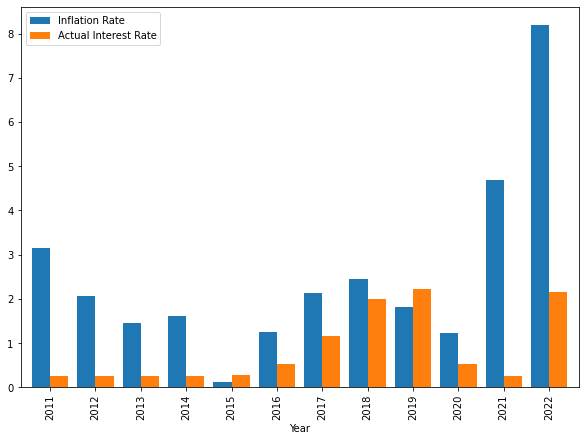

In [147]:
test_df.plot.bar(x='Year',y=['Inflation Rate','Actual Interest Rate'],figsize=(10,7),width=0.8)

# House mortgage

<AxesSubplot:xlabel='House_Price_Index_YoY', ylabel='Mortgage_Rate'>

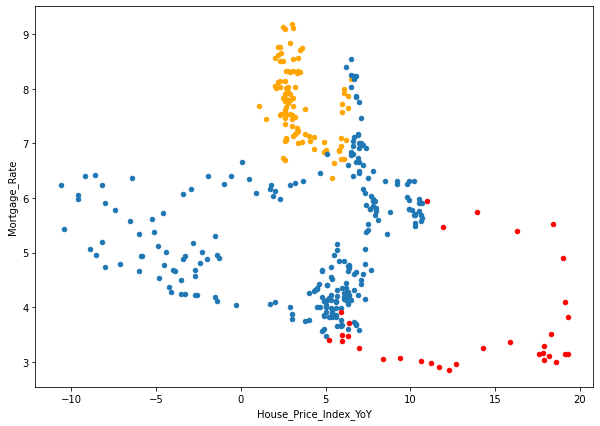

In [152]:
house_inf = Dataset[["Year","Month","House_Price_Index_YoY","Mortgage_Rate"]]
house_inf.dropna(how='any',inplace=True)
house_inf.drop_duplicates(subset=['Year','Month','House_Price_Index_YoY','Mortgage_Rate'])
# house_inf1 = house_inf.groupby(['Year','Month'])[['House_Price_Index_YoY','Mortgage_Rate']].mean()

list_help=[]
for whatever in house_inf["Mortgage_Rate"]:
    list_help.append(whatever)
house_inf["Mortgage_Rate"] = list_help
house_inf.drop_duplicates(subset=['Year','Month'],inplace=True)
ancient = house_inf.loc[house_inf['Year']<2000,:]
newwww = house_inf.loc[(house_inf['Year']>=2000) & (house_inf['Year']<2020) ,:]
recently = house_inf.loc[house_inf['Year']>=2020,:]
ax = ancient.plot.scatter(x='House_Price_Index_YoY',y='Mortgage_Rate',c='orange',figsize=(10,7))
newwww.plot.scatter(x='House_Price_Index_YoY',y='Mortgage_Rate',ax=ax)
recently.plot.scatter(x='House_Price_Index_YoY',y='Mortgage_Rate',c='red',ax=ax)

Buy_to_Rent_Ratio

In [160]:
# Buy_to_Rent_Ratio = Buy_to_Rent_Ratio[["DateTime","Value"]]
# Buy_to_Rent_Ratio["Year"] = pd.DatetimeIndex(Buy_to_Rent_Ratio["DateTime"]).year 
# Buy_to_Rent_Ratio["Month"] = pd.DatetimeIndex(Buy_to_Rent_Ratio["DateTime"]).month
Buy_to_Rent_Ratio.rename(columns = {'Value':"Buy_to_Rent_Ratio"})
Buy_to_Rent_Ratio = Buy_to_Rent_Ratio[["Year","Month","Buy_to_Rent_Ratio"]]
Buy_to_Rent_Ratio

,Year,Month,Buy_to_Rent_Ratio
0,1970,3,93.5525
1,1970,6,91.9308
2,1970,9,92.0048
3,1970,12,91.9977
4,1971,3,93.5979
...,...,...,...
206,2021,9,131.9585
207,2021,12,135.0193
208,2022,3,139.2231
209,2022,6,142.5482


In [161]:
mor_rate = Dataset[['Year','Month','Mortgage_Rate']]
third_df = pd.merge(mor_rate,Buy_to_Rent_Ratio,how='outer',on=['Year','Month'])
third_df.dropna(how='any',inplace=True)
third_df = third_df.groupby('Year')[["Mortgage_Rate","Buy_to_Rent_Ratio"]].mean().reset_index()


In [163]:
mor_list = []
for i in third_df["Mortgage_Rate"]:
    mor_list.append(i)
mor_chg_list = []
for j in range(len(mor_list)-1):
    mor_chg_list.append(((mor_list[j+1]/mor_list[j])-1)*100)
mor_chg_list.append(mor_chg_list[len(mor_chg_list)-1])


buyrent_list = []
for k in third_df["Buy_to_Rent_Ratio"]:
    buyrent_list.append(k)
buyrent_chg_list = []
for l in range(len(buyrent_list)-1):
    buyrent_chg_list.append(((buyrent_list[l+1]/buyrent_list[l])-1)*100)  
buyrent_chg_list.append(buyrent_chg_list[len(buyrent_chg_list)-1])


third_df['Mortgage Rate Change (%)'] = mor_chg_list  
third_df['B to R ratio Change (%)'] = buyrent_chg_list 

<AxesSubplot:xlabel='Year'>

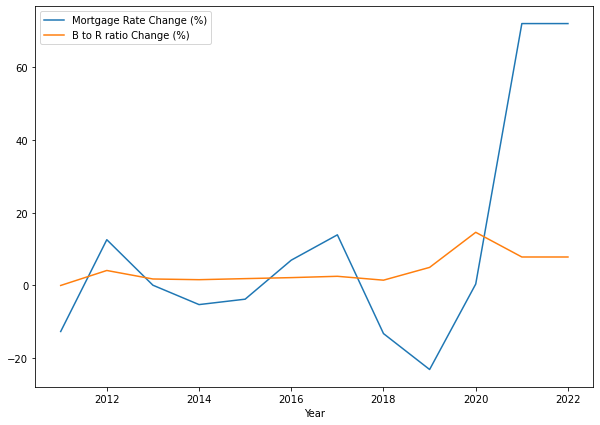

In [166]:
more_recent = third_df.loc[third_df['Year']>2010,:]
axx = more_recent.plot(x='Year',y='Mortgage Rate Change (%)',figsize=(10,7))
more_recent.plot(x='Year',y='B to R ratio Change (%)',ax=axx)